In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
random.seed(0) 
np.random.seed(0)
V = 4039
T = 1000*V
InitNode = 0

In [3]:
nodes = list(range(V)) # Get a list of only the node names
edges = np.loadtxt('facebook_combined.txt',dtype=int)

In [4]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


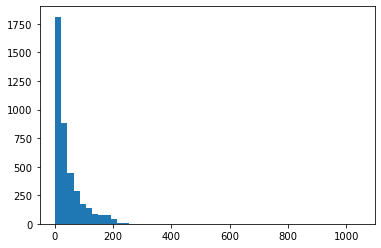

In [5]:
print(nx.info(G))
z = list(G.degree([n for n in G]))
y = [y[1] for y in z]
b = np.linspace(0,max(y))
plt.hist(y,bins=b)
plt.show()

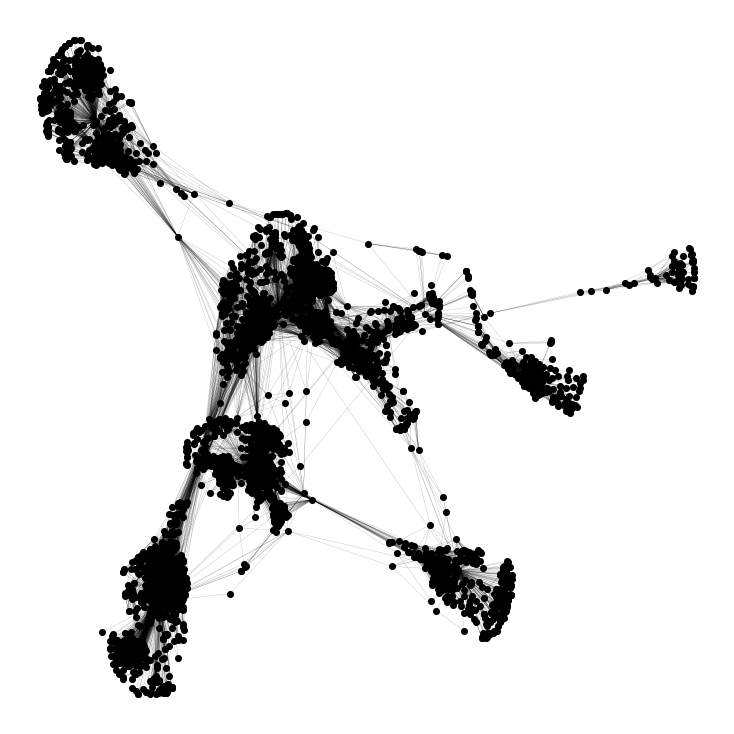

In [6]:
options = {
    "node_color": "black",
    "node_size": 50,
    "linewidths": 0,
    "width": 0.1,
}
plt.figure(1,figsize=(10,10)) 
pos = nx.spring_layout(G)  # Seed for reproducible layout
nx.draw(G, pos, **options)
plt.show()

In [7]:
nx.set_edge_attributes(G, 0,'visits')
H = G.to_directed()
nx.set_node_attributes(G, 0,'visits')

In [8]:
pi = np.array([x[1] for x in list(G.degree())])
pi = pi/np.sum(pi)

In [10]:
t = 0
v = InitNode
freq = np.empty(V)
err = []
ferr = []

while t < T:
    v_next = random.choice(list(H.adj[v]))
    H[v][v_next]['visits'] += 1
    G.nodes[v_next]['visits'] += 1
    t += 1
    v = v_next
    if t%(V//10) == 0:
        for i in range(V):
            freq[i] = G.nodes[i]['visits']
        pi_hat = freq/np.sum(freq)
        err.append(np.mean(abs(pi-pi_hat)))
        ferr.append(np.mean(abs(pi-pi_hat)/pi))

In [11]:
print('Avg visits per directed edge expected : {:.2f}'.format(0.5 * T/len(list(G.edges()))))

Avg visits per directed edge expected : 22.89


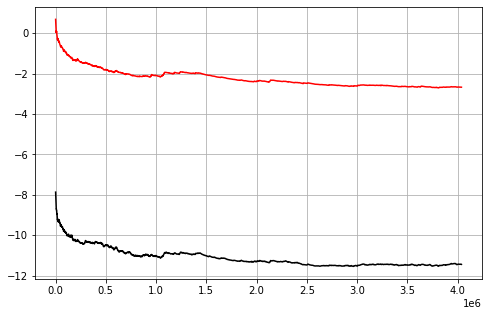

In [20]:
plt.figure(2,figsize=(8,5)) 
plt.plot(np.array(list(range(len(err))))*(V//10),np.log(err),color='black')
plt.plot(np.array(list(range(len(err))))*(V//10),np.log(ferr),color='red')
plt.grid()

In [21]:
#n_conduct = nx.algorithms.centrality.current_flow_betweenness_centrality(G)
#n_conduct = [n_conduct[x] for x in range(V)]

In [22]:
vr = nx.algorithms.centrality.voterank(G)

In [23]:
vr

[107,
 1684,
 1912,
 3437,
 0,
 2543,
 2347,
 1888,
 1800,
 348,
 483,
 2266,
 1663,
 1352,
 1941,
 1730,
 1985,
 2233,
 1431,
 2047,
 2142,
 1199,
 1584,
 2206,
 686,
 1768,
 2384,
 2611,
 1086,
 2111,
 2410,
 1589,
 414,
 2229,
 1827,
 2218,
 2199,
 1746,
 2078,
 2081,
 1126,
 2123,
 2839,
 1577,
 1804,
 1993,
 2133,
 1390,
 2560,
 2328,
 3363,
 1377,
 376,
 917,
 2507,
 2289,
 896,
 3101,
 1612,
 2007,
 1983,
 3291,
 1277,
 1559,
 2054,
 2754,
 2464,
 475,
 1707,
 1783,
 2598,
 2742,
 2240,
 1835,
 3830,
 3082,
 2283,
 1833,
 2309,
 3426,
 3397,
 428,
 2333,
 1621,
 3320,
 637,
 2244,
 3090,
 136,
 1104,
 1714,
 1718,
 2602,
 2951,
 2966,
 1610,
 1235,
 3280,
 2282,
 484,
 2088,
 2944,
 1078,
 1204,
 3434,
 2117,
 517,
 1622,
 2526,
 3232,
 1472,
 1459,
 2863,
 2087,
 412,
 1376,
 3596,
 2786,
 2730,
 2131,
 2877,
 353,
 1613,
 3116,
 3938,
 2268,
 828,
 2542,
 1014,
 563,
 1391,
 2986,
 3051,
 2313,
 56,
 1591,
 3545,
 3154,
 366,
 2590,
 2336,
 925,
 2719,
 1583,
 3387,
 67,
 363,

In [53]:
Gf = nx.Graph()
Gf.add_nodes_from(nodes)
Gf.add_edges_from(edges)

In [54]:
nx.set_edge_attributes(Gf, 0,'visits')
Hf = Gf.to_directed()
nx.set_node_attributes(Gf, 0,'visits')

In [55]:
#Hf.adj[1684,3437
## 107  & 1912
## 3437 & 1684
elist = [(107,1912),(1912,107),(3437,1684),(1684,3437)]
Hf.add_edges_from(elist,visits=0)

In [56]:
t = 0
v = InitNode
freq_acc = np.zeros(V)
err_acc = []
ferr_acc = []

while t < T:
    v_next = random.choice(list(Hf.adj[v]))
    Hf[v][v_next]['visits'] += 1
    if (v,v_next) not in elist:
        Gf.nodes[v_next]['visits'] += 1
    t += 1
    v = v_next
    if t%(V//10) == 0:
        for i in range(V):
            freq_acc[i] = Gf.nodes[i]['visits']
        pi_hat_acc = freq_acc/np.sum(freq_acc)
        err_acc.append(np.mean(abs(pi-pi_hat_acc)))
        ferr_acc.append(np.mean(abs(pi-pi_hat_acc)/pi))

In [57]:
print(sum([G.nodes[i]['visits'] for i in range(V)]))
print(sum([Gf.nodes[i]['visits'] for i in range(V)]))

4039403
4038923


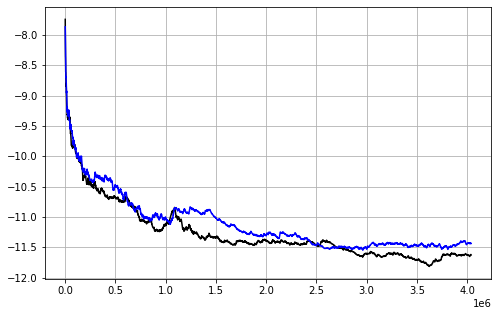

In [63]:
plt.figure(3,figsize=(8,5)) 
plt.plot(np.array(list(range(len(err_acc))))*(V//10),np.log(err_acc),color='black')
#plt.plot(np.array(list(range(len(err_acc))))*(V//10),np.log(ferr_acc),color='red')
plt.plot(np.array(list(range(len(err_acc))))*(V//10),np.log(err),color='blue')
#plt.plot(np.array(list(range(len(err_acc))))*(V//10),np.log(ferr),color='green')
plt.grid()

In [59]:
err

[0.0003830720441466285,
 0.0003618802320534391,
 0.0003472008099616569,
 0.00033582570059473554,
 0.00032792093934485927,
 0.0002848309818880489,
 0.00026666492033956395,
 0.00023726367568024283,
 0.00021894465109044306,
 0.00020474356638048002,
 0.0001965025129787086,
 0.0001921617829745354,
 0.00018642864780046527,
 0.00017933237479316624,
 0.00016977836369378457,
 0.00016940692369482393,
 0.00016716366446526066,
 0.00016808763447216876,
 0.00016753184133661895,
 0.00016541605237977114,
 0.00016030238073408984,
 0.00015862856162765932,
 0.0001558403286895219,
 0.00015605334802676584,
 0.00015104239273501025,
 0.00015153289352903352,
 0.00015012588094491077,
 0.00014121010511954093,
 0.00013408085719181207,
 0.00013082681199529922,
 0.00012881502643968397,
 0.00012969665636801907,
 0.00013012592351942945,
 0.00013246471332723658,
 0.0001329629684860209,
 0.00012850139061363822,
 0.00012524496528194335,
 0.00012443681874748193,
 0.00012405711363715864,
 0.00012226087428229368,
 0.00011

In [60]:
err_acc

[0.00043328819033127287,
 0.00036524542302953695,
 0.00034750458384785217,
 0.000301374951202161,
 0.0002624126916981205,
 0.0002424954817255211,
 0.0002336267648755927,
 0.00023060456901598982,
 0.00020106270634999898,
 0.00019109365187375382,
 0.00018556352001792805,
 0.0001822963931797211,
 0.0001817959482099745,
 0.00018099254688595234,
 0.0001808562894831034,
 0.00017699037024870162,
 0.00017509752420220864,
 0.00017183645204229872,
 0.00015769290510635604,
 0.00014768898127829426,
 0.00014357888937811586,
 0.00014589025284053505,
 0.0001478273659824949,
 0.00015086919358356623,
 0.00014989442648221863,
 0.00014286483179045052,
 0.00014226499997254234,
 0.000135025281221293,
 0.0001338920366373044,
 0.00013357942835782628,
 0.00012703475025035687,
 0.000122184410085255,
 0.00011968609081421896,
 0.00011624661156900064,
 0.0001123520513766025,
 0.00010908420592117439,
 0.00010711304572823836,
 0.00010484904620402783,
 0.000101688545675336,
 9.954686473988979e-05,
 9.85643441937937e

In [64]:
print('J')

J
